In [1]:
# extract and plot each detected face in a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN
import cv2
import os

Using TensorFlow backend.


In [4]:
# draw each face separately
def draw_faces(filename, result_list):
    
    # load the image
    data = pyplot.imread(filename)
    
    # plot each face as a subplot
    for i in range(len(result_list)):
        
        # get coordinates
        x1, y1, width, height = result_list[i]['box']
        x2, y2 = x1 + width, y1 + height
        
        # define subplot
        pyplot.subplot(1, len(result_list), i+1)
        pyplot.axis('off')
        
        # plot face
        pyplot.imshow(data[y1:y2, x1:x2])
        
        # check if directory is present or not - if not then creates one
        filename = 'img'+str(i)+'.jpg'
        path = os.getcwd()+'\\test_faces\\'
        check = os.path.isdir(path)
        if (not check):
            os.mkdir(test_faces)
        
        #writes the detected faces in specified directory
        cv2.imwrite(path+filename, data[y1:y2, x1:x2])
        
    # show the plot
    pyplot.show()

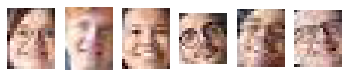

In [5]:
filename = 'test2.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_faces(filename, faces)